### **CROP RECOMMENDATION USING MACHINE LEARNING**





In [2]:
#import library yang dibutuhkan
import IPython
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")






In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files
import pandas as pd
import io

# Mengunggah file CSV dari komputer
upload_files = files.upload()

# Membaca file CSV yang diunggah
for filename in upload_files.keys():
    data = pd.read_csv(io.StringIO(upload_files[filename].decode('utf-8')))

# Menampilkan lima baris pertama dari data
print(data.head(5))

# Menampilkan ukuran data (jumlah baris dan kolom)
print("Ukuran Data:", data.shape)

Saving Crop_recommendation.csv to Crop_recommendation.csv
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Ukuran Data: (2200, 8)


In [5]:
data.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
# Splitting the labels and features
X = data.iloc[:, :7].values
y = data.iloc[:, 7].values

#train - test split rate (feel free to change)
split_ratio = 0.8

#shuffling the data
np.random.seed(69) #for reproducibility
n_data = X.shape[0] #jumlah data
shuffled_index = np.random.permutation(n_data) #index teracak sebanyak jumlah data

#the split index
split_index = int(n_data * split_ratio)

#splitting the data
X_train = X[shuffled_index[:split_index]]
X_test = X[shuffled_index[split_index:]]

y_train = y[shuffled_index[:split_index]]
y_test = y[shuffled_index[split_index:]]

print("X_train size : ", X_train.shape[0])
print("X_test size : ", X_test.shape[0],'\n')

print("y_train size : ", y_train.shape[0])
print("y_test size : ", y_test.shape[0],'\n')

X_train size :  1760
X_test size :  440 

y_train size :  1760
y_test size :  440 



In [7]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [12]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [13]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [14]:
crop_summary = pd.pivot_table(data,index = ['label'], aggfunc ='mean')

In [15]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [16]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [17]:
import plotly.express as px

In [18]:
fig = px.box(data, y ="N", points ="all")
fig.show()

In [19]:
fig = px.box(data, y ="P", points ="all")
fig.show()

In [20]:
fig = px.box(data, y ="K", points ="all")
fig.show()

In [21]:
fig = px.box(data, y ="temperature", points ="all")
fig.show()

In [22]:
fig = px.box(data, y ="humidity", points ="all")
fig.show()

In [23]:
fig = px.box(data, y ="ph", points ="all")
fig.show()

In [24]:
fig = px.box(data, y ="rainfall", points ="all")
fig.show()

In [25]:
# deteksi pencilan dan hapus pencilan
df_boston = data
df_boston.columns = df_boston.columns
df_boston.head()

Q1 = np.percentile(df_boston['rainfall'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df_boston['rainfall'], 75,
                   interpolation = 'midpoint')
IQR = Q3 -Q1
print('Old Shape : ', df_boston.shape)

#upper
upper = np.where(df_boston['rainfall']>= (Q3+1.5*IQR))
#lower
lower = np.where(df_boston['rainfall']<= (Q1-1.5*IQR))

# menghapus outliers
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)

print("New Shape : ", df_boston.shape)

Old Shape :  (2200, 8)
New Shape :  (2101, 8)


In [26]:
data = df_boston

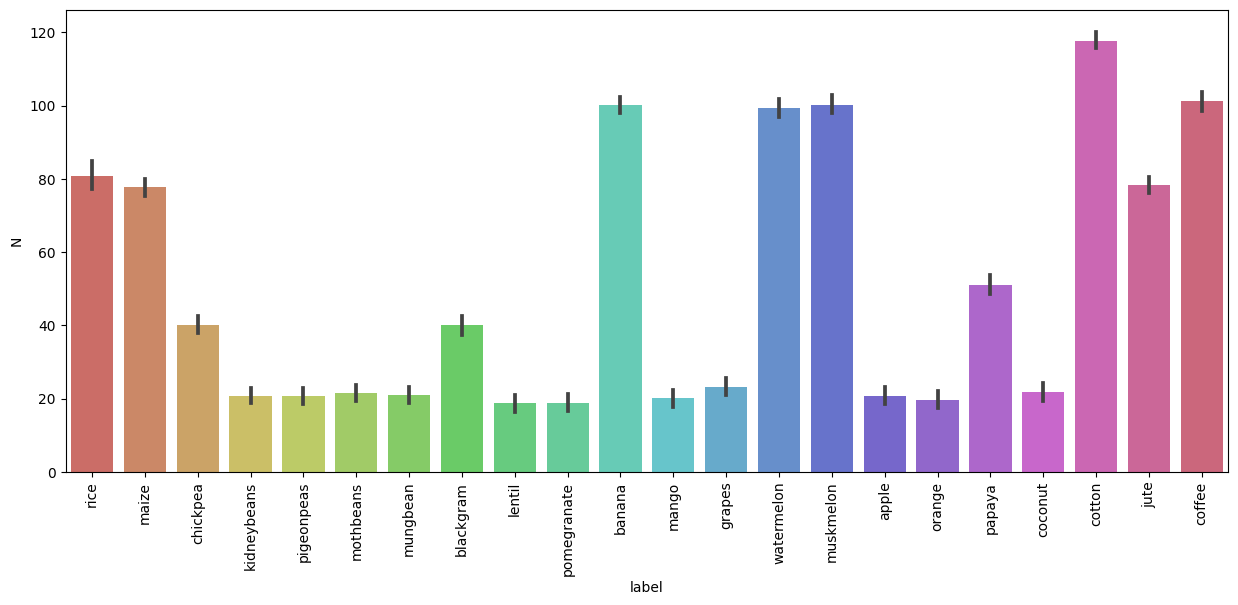

In [27]:
plt.figure(figsize = (15,6))
sns.barplot(y = 'N', x ='label', data = data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [28]:
pip install plotly

In [29]:
crop_summary_new = data.copy()

In [30]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [31]:
fig1 = px.bar(crop_summary_new, x = 'label', y = 'N')
fig1.show()

In [32]:
fig1 = px.bar(crop_summary_new, x = 'label', y = 'P')
fig1.show()

In [33]:
fig1 = px.bar(crop_summary_new, x = 'label', y = 'K')
fig1.show()

In [34]:
import random
from IPython.core.display import update_display

In [35]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.237127,-0.139970,0.041633,0.189609,0.099238,0.003231
P,-0.237127,1.000000,0.737806,-0.133415,-0.111730,-0.146018,-0.046656
K,-0.139970,0.737806,1.000000,-0.165188,0.198119,-0.174559,-0.042466
temperature,0.041633,-0.133415,-0.165188,1.000000,0.203789,-0.021339,-0.039570
humidity,0.189609,-0.111730,0.198119,0.203789,1.000000,-0.005955,0.020846
ph,0.099238,-0.146018,-0.174559,-0.021339,-0.005955,1.000000,-0.127166
rainfall,0.003231,-0.046656,-0.042466,-0.039570,0.020846,-0.127166,1.000000


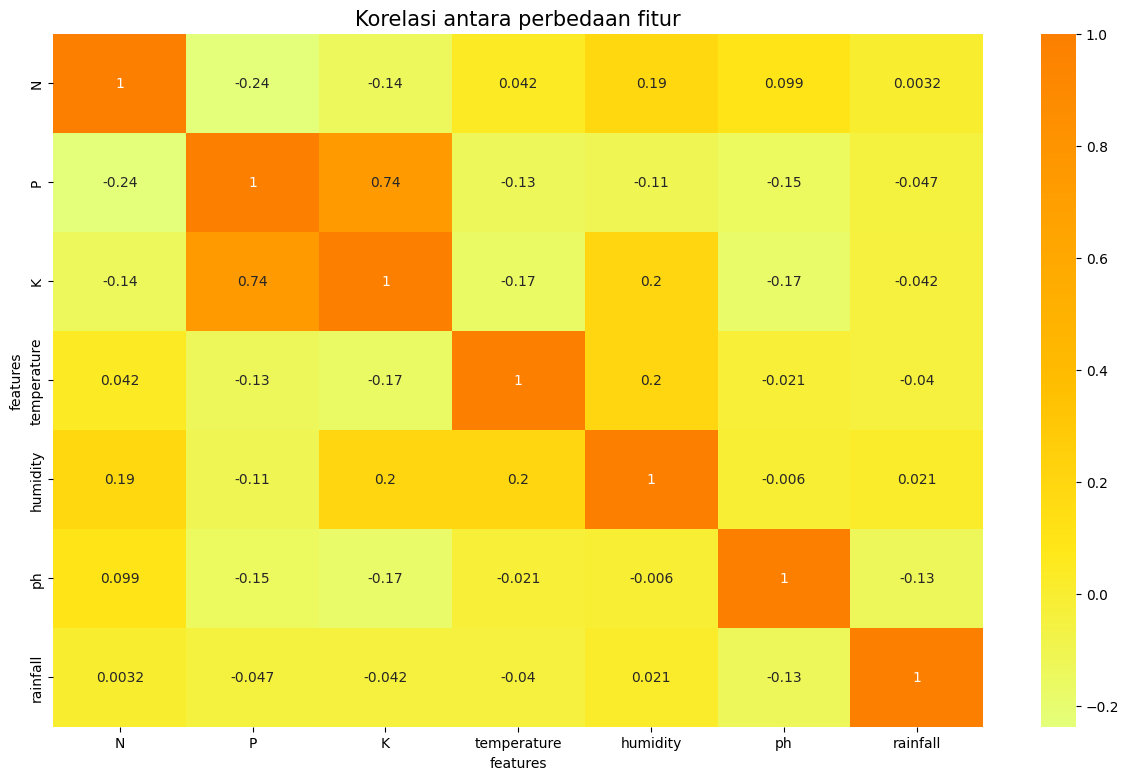

In [36]:
fig, ax = plt.subplots(1,1, figsize=(15,9))
sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
ax.set(xlabel = 'features')
ax.set(ylabel = 'features')
plt.title('Korelasi antara perbedaan fitur', fontsize = 15, c = 'black')
plt.show()

In [37]:
X = data.drop('label', axis = 1)
y =data['label']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30,
                                                      shuffle = True, random_state = 0)

In [39]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 1470, number of used features: 7
[LightGBM] [Info] Start training from score -3.030338
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.103363
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.088325
[LightGBM] [Info] Start training from score -2.949212
[LightGBM] [Info] Start training from score -3.044522
[LightGBM] [Info] Start training from score -3.058911
[LightGBM] [Info] Start training from score -3.088325
[LightGBM] [Info] Start training from score -3.030338
[LightGBM] [Info] Start training from score -3.016352
[LightGBM] [Info] Start training from score -2.949212
[LightGBM] 

LGBMClassifier()

In [40]:
model_withoutlgbm = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (7)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(22,activation='softmax'),
])
model_withoutlgbm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_2 = label_encoder.fit_transform(y_train.to_numpy())
y_test_2 = label_encoder.fit_transform(y_test.to_numpy())
y_train_2 = tf.keras.utils.to_categorical(y_train_2)
y_test_2 = tf.keras.utils.to_categorical(y_test_2)

In [42]:
model_withoutlgbm.fit(X_train, y_train_2, validation_data=(X_test, y_test_2), epochs = 100)

Epoch 1/100
46/46 [==============================] - 7s 17ms/step - loss: 5.4988 - accuracy: 0.2646 - val_loss: 1.0997 - val_accuracy: 0.5658
Epoch 2/100
46/46 [==============================] - 0s 8ms/step - loss: 0.6824 - accuracy: 0.7687 - val_loss: 0.4866 - val_accuracy: 0.8542
Epoch 3/100
46/46 [==============================] - 0s 9ms/step - loss: 0.3870 - accuracy: 0.8857 - val_loss: 0.3685 - val_accuracy: 0.8843
Epoch 4/100
46/46 [==============================] - 0s 8ms/step - loss: 0.2861 - accuracy: 0.9211 - val_loss: 0.3398 - val_accuracy: 0.8938
Epoch 5/100
46/46 [==============================] - 0s 10ms/step - loss: 0.2642 - accuracy: 0.9184 - val_loss: 0.3170 - val_accuracy: 0.8843
Epoch 6/100
46/46 [==============================] - 0s 10ms/step - loss: 0.2202 - accuracy: 0.9354 - val_loss: 0.2387 - val_accuracy: 0.9113
Epoch 7/100
46/46 [==============================] - 0s 10ms/step - loss: 0.2133 - accuracy: 0.9429 - val_loss: 0.2574 - val_accuracy: 0.9192
Epoch 8/1

In [43]:
y_pred = model.predict(X_test)

In [44]:
y_pred_2 = model_withoutlgbm.predict(X_test)

20/20 [==============================] - 0s 2ms/step


In [45]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print("LightGBM Model accuracy score: {0:0.4f}".format(accuracy_score(y_test,y_pred)))

LightGBM Model accuracy score: 0.9889


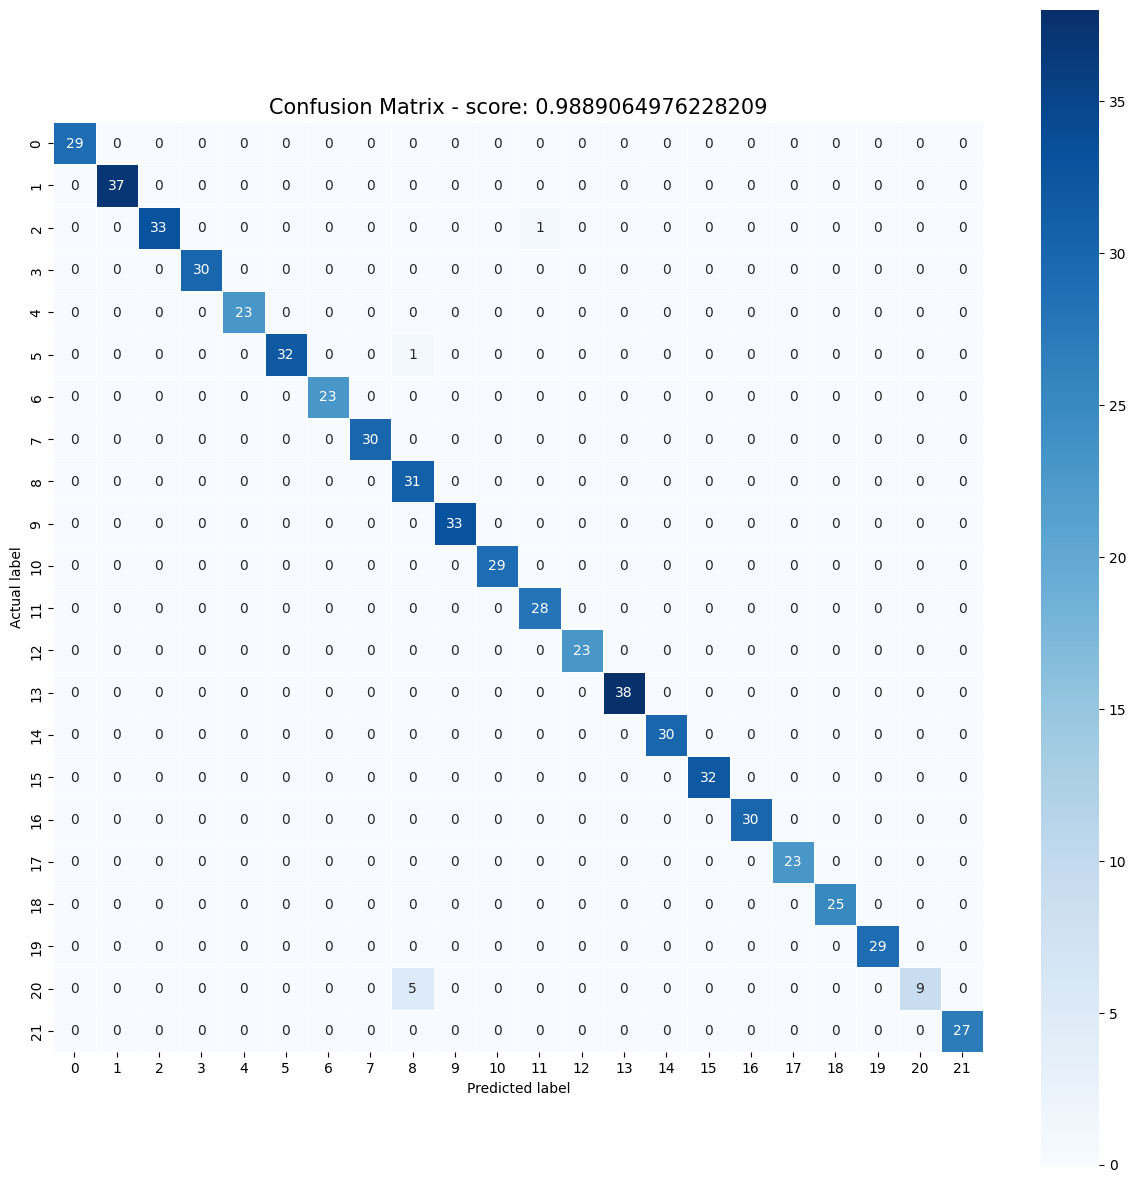

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize = (15,15))
sns.heatmap(cm, annot = True, fmt=".0f", linewidth = .5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score: ' + str(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       1.00      0.97      0.99        34
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        23
      coffee       1.00      0.97      0.98        33
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        30
        jute       0.84      1.00      0.91        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        29
       maize       0.97      1.00      0.98        28
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       1.00    

In [48]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier(criterion = 'entropy', random_state= 5)

In [49]:
Classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=5)

In [50]:
y_pred = Classifier.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('decision tree model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

decision tree model accuracy score: 0.9842


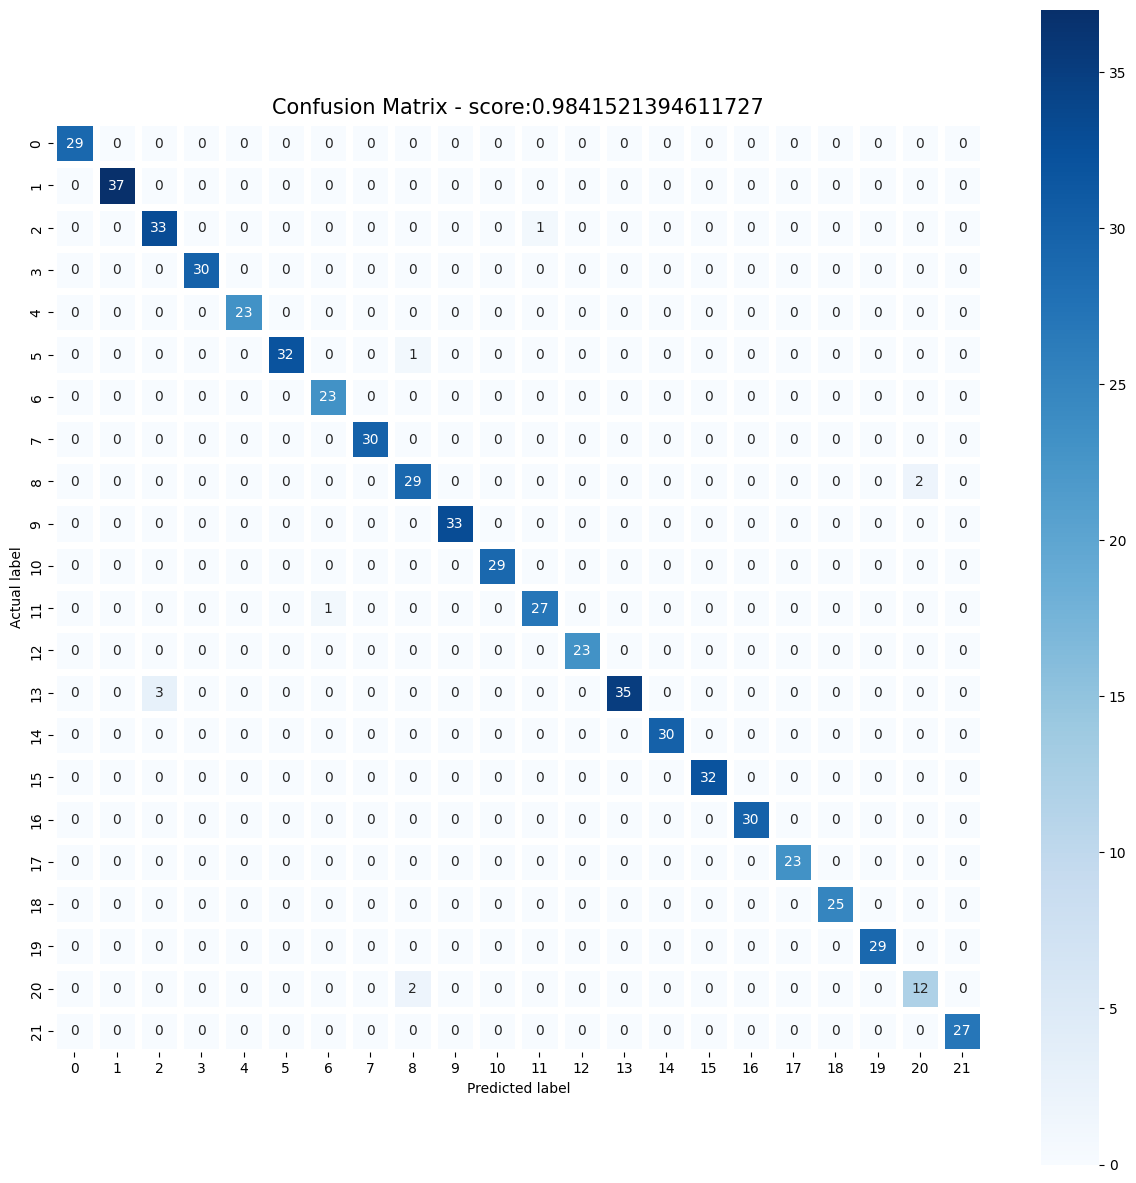

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize =(15,15))
sns.heatmap(cm, annot = True, fmt='.0f', linewidths= 5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:' + str(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       0.92      0.97      0.94        34
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        23
      coffee       1.00      0.97      0.98        33
      cotton       0.96      1.00      0.98        23
      grapes       1.00      1.00      1.00        30
        jute       0.91      0.94      0.92        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       1.00      1.00      1.00        29
       maize       0.96      0.96      0.96        28
       mango       1.00      1.00      1.00        23
   mothbeans       1.00      0.92      0.96        38
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       1.00    

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
classifier_lr = LogisticRegression(random_state = 5)

In [56]:
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=5)

In [57]:
y_pred = classifier_lr.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print('Logistic Regression Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression Model accuracy score: 0.9445


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        37
   blackgram       0.87      0.79      0.83        34
    chickpea       1.00      1.00      1.00        30
     coconut       0.92      1.00      0.96        23
      coffee       1.00      1.00      1.00        33
      cotton       0.78      0.91      0.84        23
      grapes       1.00      1.00      1.00        30
        jute       0.81      0.94      0.87        31
 kidneybeans       1.00      1.00      1.00        33
      lentil       0.88      1.00      0.94        29
       maize       0.81      0.79      0.80        28
       mango       1.00      1.00      1.00        23
   mothbeans       0.91      0.76      0.83        38
    mungbean       0.97      1.00      0.98        30
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        30
      papaya       0.95    

In [60]:
X_test[4:]

,N,P,K,temperature,humidity,ph,rainfall
1697,6,7,7,27.681673,94.473169,7.199106,113.999515
1749,39,64,52,28.918425,94.636768,6.678696,63.687946
888,10,70,19,24.849184,68.980884,7.272428,41.610805
974,15,6,41,19.008707,88.837681,6.897368,108.679398
1639,1,17,6,10.786898,91.384119,6.819827,117.529345
...,...,...,...,...,...,...,...
1549,19,122,202,23.344674,90.379815,5.811975,112.895402
1951,100,40,20,22.451460,76.256749,7.432044,86.849987
1832,38,14,30,26.924495,91.201060,5.570745,194.902214
832,2,78,23,21.318521,66.439346,7.320515,45.426168


In [61]:
result = Classifier.predict(X_test[4:5])

In [62]:
result

array(['orange'], dtype=object)

In [63]:
y_test[4:5]

1697    orange
Name: label, dtype: object

In [64]:
#save the model to hdf5 format
model_withoutlgbm.save("model.h5")

#download the model
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
import pickle

#save the model to pickle format
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

#download the pkl file
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:

'''Fungsi untuk prediksi tanaman berdasarkan input pengguna'''
def predict_crop(N, P, K, temperature, humidity,ph , rainfall):
    input_data = np.array([[N, P, K,temperature ,humidity ,ph ,rainfall]])
    prediction = model_withoutlgbm(input_data)
    predicted_class = np.argmax(prediction)
    crop_label = label_encoder.inverse_transform([predicted_class])[0]
    return crop_label

In [67]:
print(predict_crop(6,7,7,27.681673,94.47316,7.19910,113.999515))

orange
